In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('mnist_train.csv')
x_train = df.drop('label', axis=1)
y_train = df['label']

x_train.head(2)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x_train = x_train.astype("float32") / 255

In [9]:
x_train.shape

(60000, 784)

In [4]:
import keras

In [5]:
input_shape = (784,)
encoder = keras.models.Sequential([keras.layers.Dense(2)])
decoder = keras.models.Sequential([keras.layers.Dense(input_shape[0])])

autoencoder = keras.Sequential([
        keras.layers.Input(shape=input_shape),
        encoder, 
        decoder
])
autoencoder.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 2)              │         1,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 784)            │         2,352 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,922 (15.32 KB)

 Trainable params: 3,922 (15.32 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.1))
history = autoencoder.fit(x_train.values, x_train.values, epochs=20)
codings = encoder.predict(x_train)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - loss: 0.0965
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 586us/step - loss: 0.0635
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - loss: 0.0632
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 576us/step - loss: 0.0624
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 568us/step - loss: 0.0605
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - loss: 0.0590
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 567us/step - loss: 0.0583
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - loss: 0.0579
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 559us/step - loss: 0.0580
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - loss: 0.0577
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step - loss: 0.0575
Epoch 12/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - loss: 0.0576
Epoch 13/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - loss: 0.0576
Epoch 14/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 555us/step - loss: 0.0576
E

In [8]:
T = codings
T.shape

(60000, 2)

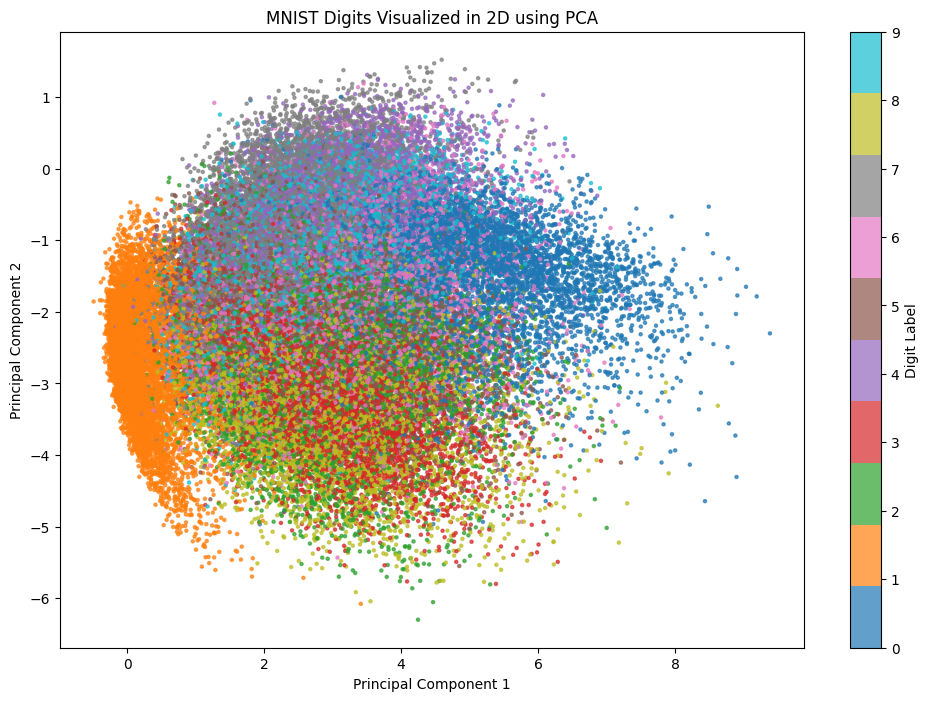

In [10]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(T[:, 0], T[:, 1], c=y_train, cmap='tab10', alpha=0.7, s=5)
plt.colorbar(scatter, label='Digit Label')
plt.title('MNIST Digits Visualized in 2D using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

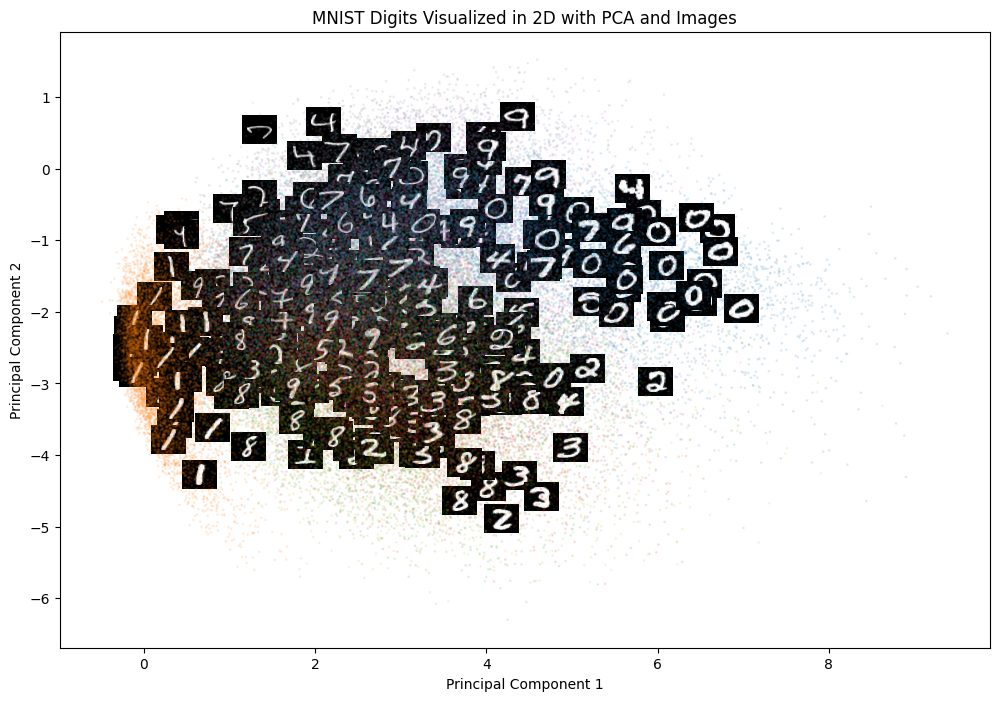

In [11]:

# Plot setup
plt.figure(figsize=(12, 8))
plt.title('MNIST Digits Visualized in 2D with PCA and Images')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot subset with digit images
indices = np.random.choice(len(T), size=300, replace=False)
for i in indices:
    x, y_pos = T[int(i),:]
    digit_image = x_train.values[i].reshape(28, 28)
    plt.imshow(
        digit_image, extent=(x-0.2, x+0.2, y_pos-0.2, y_pos+0.2), cmap='gray', aspect='auto'
    )

# Scatter plot for context
plt.scatter(T[:, 0], T[:, 1], c=y_train, cmap='tab10', alpha=0.1, s=1)

plt.show()
